<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI
## Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labourious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.
Is this guy going to donate blood in march 2007 or not?
## Actual Question
Choose the **one** question that should be answered.
Is this guy going to donate blood in march 2007 or not?

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
x = 'transfusion.data'
df = pd.read_csv(x)

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [4]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [8]:
df.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [12]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [14]:
df[df['Monetary (c.c. blood)'] <=500]

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
47,2,2,500,2,0
48,2,2,500,2,0
49,2,2,500,2,0
67,0,2,500,4,0
73,2,2,500,4,0
...,...,...,...,...,...
740,23,1,250,23,0
743,23,2,500,38,0
744,21,2,500,52,0
746,39,1,250,39,0


<Axes: >

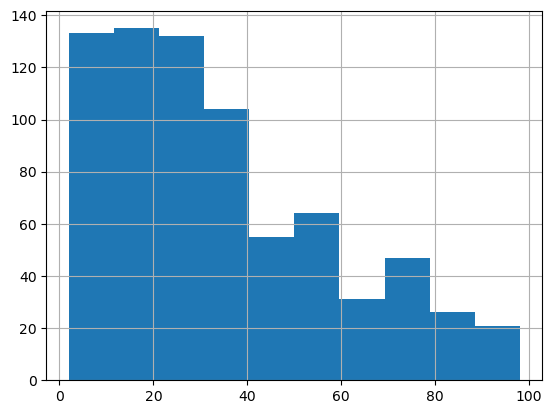

In [16]:
df["Time (months)"].hist()


<function matplotlib.pyplot.show(close=None, block=None)>

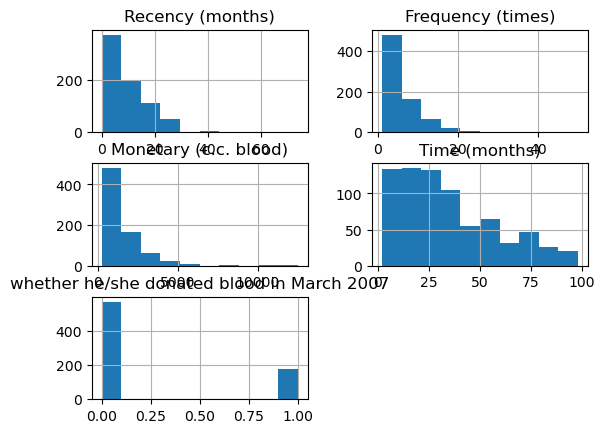

In [17]:
df.hist()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

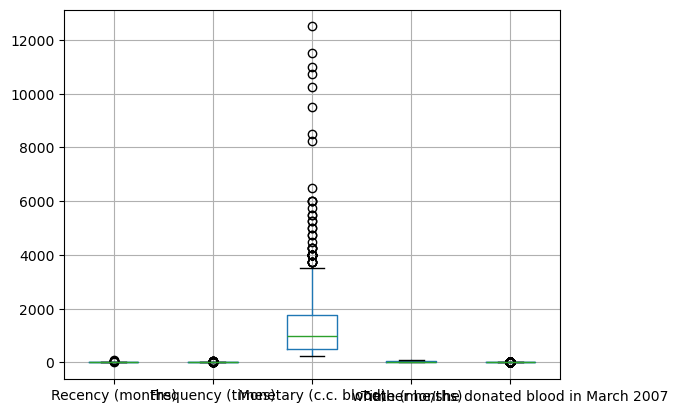

In [27]:
df.boxplot()
plt.show

In [29]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                            Recency (months)  \
Recency (months)                                    1.000000   
Frequency (times)                                  -0.182745   
Monetary (c.c. blood)                              -0.182745   
Time (months)                                       0.160618   
whether he/she donated blood in March 2007         -0.279869   

                                            Frequency (times)  \
Recency (months)                                    -0.182745   
Frequency (times)                                    1.000000   
Monetary (c.c. blood)                                1.000000   
Time (months)                                        0.634940   
whether he/she donated blood in March 2007           0.218633   

                                            Monetary (c.c. blood)  \
Recency (months)                                        -0.182745   
Frequency (times)                                        1.000000   
Monetary (c.c. bl

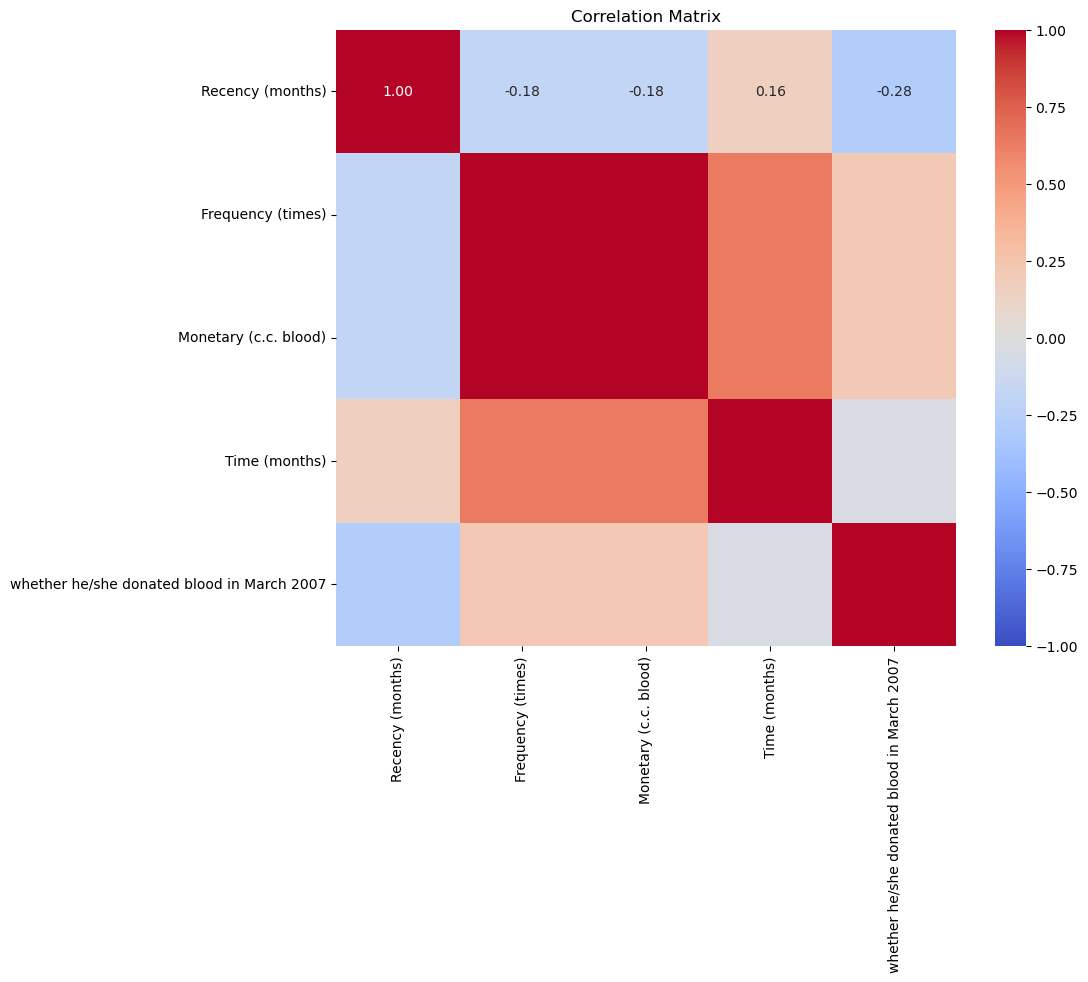

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

In [34]:
q1= df.quantile(0.25)
q3= df.quantile(0.75)
iqr= q3 - q1

lower_bound= q1-1.5*iqr
upper_bound= q3+1.5*iqr

df_no_outliers = df[~((df < lower_bound)|(df > upper_bound)).any(axis=1)]

In [36]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 5 to 745
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            538 non-null    int64
 1   Frequency (times)                           538 non-null    int64
 2   Monetary (c.c. blood)                       538 non-null    int64
 3   Time (months)                               538 non-null    int64
 4   whether he/she donated blood in March 2007  538 non-null    int64
dtypes: int64(5)
memory usage: 25.2 KB


In [38]:
print(df.isnull().sum())

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64


In [40]:
x="1"+"1"

y=1+1
print(x)
print(y)

11
2


# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


In [49]:
X = df.drop(columns='whether he/she donated blood in March 2007')
y = df['whether he/she donated blood in March 2007']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model= DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
y_pred = model.predict(X_test)
y_train_pred =model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy= accuracy_score(y_test, y_pred)
print(train_accuracy)
print(test_accuracy)

0.9579349904397706
0.6666666666666666


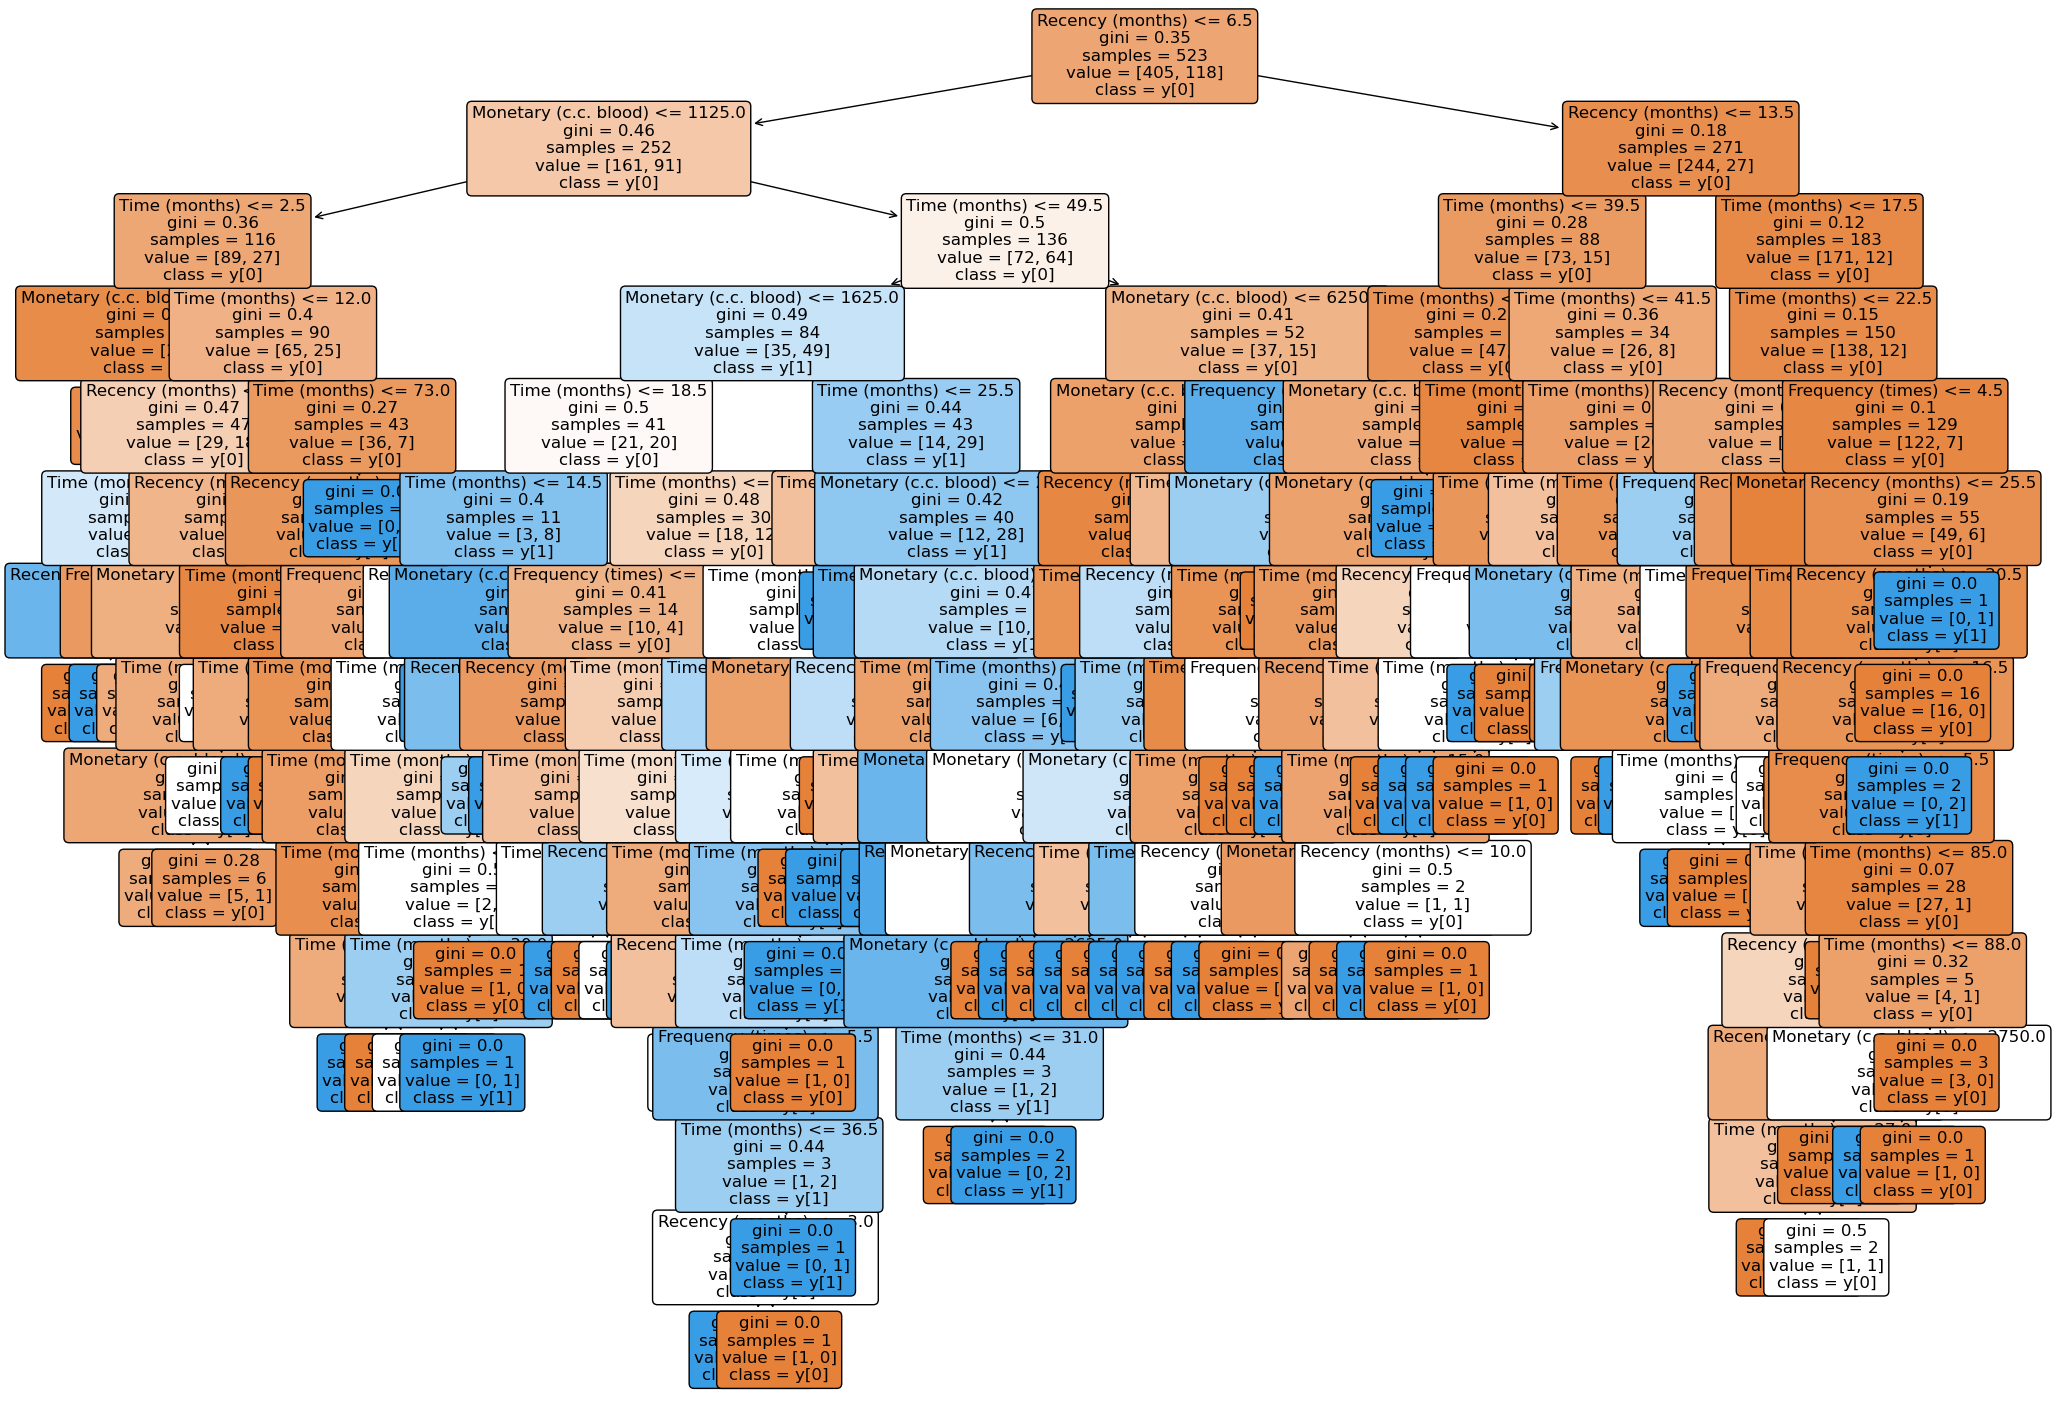

In [62]:
plt.figure(figsize=(24, 18)) 
plot_tree(
    model, 
    filled=True, 
    feature_names=X.columns, 
    class_names=True, 
    fontsize=12,       
    proportion=False,   
    rounded=True,       
    precision=2         
)
plt.show()

In [63]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc:.4f}')

ROC AUC: 0.5647


In [64]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[133  32]
 [ 43  17]]


In [65]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       165
           1       0.35      0.28      0.31        60

    accuracy                           0.67       225
   macro avg       0.55      0.54      0.55       225
weighted avg       0.65      0.67      0.66       225



In [66]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [67]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='roc_auc',  # Use ROC AUC as the evaluation metric
    n_jobs=-1,  # Use all available CPUs
    verbose=1  # Print progress messages
)

In [74]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc', verbose=1)

In [75]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best ROC AUC Score: {best_score:.4f}')

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best ROC AUC Score: 0.6651


In [76]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f'Optimized Accuracy: {accuracy_best:.4f}')
print(f'Optimized ROC AUC: {roc_auc_best:.4f}')

Optimized Accuracy: 0.6756
Optimized ROC AUC: 0.6604


# Step 7: Split the Data
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [81]:
print(f"Total number of observations: {len(df)}")

Total number of observations: 748


In [83]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [85]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)



In [87]:
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 523
Validation set size: 112
Test set size: 113


# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [90]:
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [98]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [100]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [102]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

Best Parameters: {'C': 100, 'penalty': 'l2'}


In [104]:
# Evaluate the best model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]
accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

In [106]:
print(f'Improved Accuracy: {accuracy_best:.4f}')
print(f'Improved ROC AUC: {roc_auc_best:.4f}')
print('Confusion Matrix:')
print(conf_matrix_best)
print('Classification Report:')
print(class_report_best)

Improved Accuracy: 0.7611
Improved ROC AUC: 0.7651
Confusion Matrix:
[[84  2]
 [25  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        86
           1       0.50      0.07      0.13        27

    accuracy                           0.76       113
   macro avg       0.64      0.53      0.50       113
weighted avg       0.71      0.76      0.69       113



# Step 9: Fit the Model

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [110]:
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

In [112]:
accuracy_train = accuracy_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)

In [114]:
print(f'Training Accuracy: {accuracy_train:.4f}')
print(f'Training ROC AUC: {roc_auc_train:.4f}')
print('Training Confusion Matrix:')
print(conf_matrix_train)
print('Training Classification Report:')
print(class_report_train)

Training Accuracy: 0.7744
Training ROC AUC: 0.7448
Training Confusion Matrix:
[[390   9]
 [109  15]]
Training Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       399
           1       0.62      0.12      0.20       124

    accuracy                           0.77       523
   macro avg       0.70      0.55      0.54       523
weighted avg       0.74      0.77      0.71       523



# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [116]:
y_test_pred = best_model.predict(X_test)
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]


In [118]:
accuracy_test = accuracy_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

In [120]:
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test ROC AUC: {roc_auc_test:.4f}')
print('Test Confusion Matrix:')
print(conf_matrix_test)
print('Test Classification Report:')
print(class_report_test)

Test Accuracy: 0.7611
Test ROC AUC: 0.7651
Test Confusion Matrix:
[[84  2]
 [25  2]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        86
           1       0.50      0.07      0.13        27

    accuracy                           0.76       113
   macro avg       0.64      0.53      0.50       113
weighted avg       0.71      0.76      0.69       113



# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [126]:
#feature_importances_
from sklearn.ensemble import RandomForestClassifier

In [128]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [130]:
importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [132]:
print(importance_df)

                 Feature  Importance
3          Time (months)    0.438535
0       Recency (months)    0.251448
1      Frequency (times)    0.155498
2  Monetary (c.c. blood)    0.154519


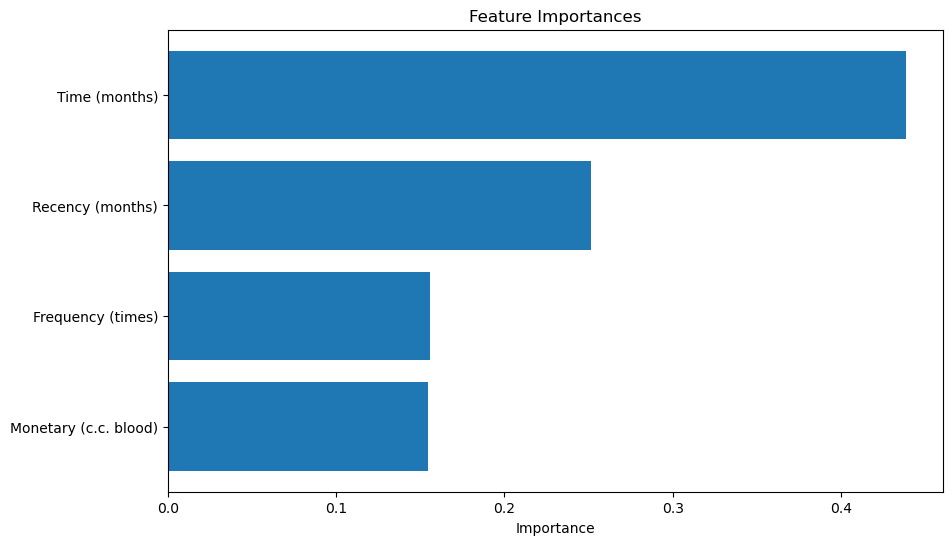

In [134]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#importances = model.feature_importances_

In [138]:
# Define and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [140]:
# Extract coefficients
coefficients = model.coef_[0]
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

In [142]:
# Print the DataFrame
print(importance_df)

                 Feature  Coefficient
2  Monetary (c.c. blood)     0.000486
1      Frequency (times)     0.000002
3          Time (months)    -0.020907
0       Recency (months)    -0.092904


In [158]:
#class imbalance handling
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [162]:
# 1. Handling Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [164]:
# Train a RandomForestClassifier with the resampled data
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [166]:
# Evaluate the model
y_pred_smote = model_smote.predict(X_test)
y_pred_proba_smote = model_smote.predict_proba(X_test)[:, 1]

print("Performance with SMOTE:")
print(classification_report(y_test, y_pred_smote))
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba_smote):.4f}')

Performance with SMOTE:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        86
           1       0.38      0.56      0.45        27

    accuracy                           0.67       113
   macro avg       0.61      0.63      0.61       113
weighted avg       0.73      0.67      0.69       113

ROC AUC: 0.7046


In [168]:
# 2. Handling Class Imbalance with Class Weights
model_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
model_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [170]:
# Evaluate the model
y_pred_weighted = model_weighted.predict(X_test)
y_pred_proba_weighted = model_weighted.predict_proba(X_test)[:, 1]

print("Performance with Class Weights:")
print(classification_report(y_test, y_pred_weighted))
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba_weighted):.4f}')

Performance with Class Weights:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        86
           1       0.42      0.41      0.42        27

    accuracy                           0.73       113
   macro avg       0.62      0.62      0.62       113
weighted avg       0.72      0.73      0.72       113

ROC AUC: 0.6656




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



